# Machine Learning in Python - Project 2

Due Wednesday, April 15th by 5 pm.

## 1. Setup

### 1.1 Libraries

In [58]:
# Add any additional libraries or submodules below

import pkg_resources
if pkg_resources.get_distribution("scikit-learn").version == '0.21.3':
    !pip install --upgrade scikit-learn

# Display plots inline
%matplotlib inline

#install imlearn
! pip install imblearn
!pip install --upgrade tensorflow


# Data libraries
import tensorflow 
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# ipython interactive widgets
from ipywidgets import interact


# sklearn modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix



Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.7/site-packages (0.22.2.post1)
Requirement already up-to-date: tensorflow in /opt/conda/lib/python3.7/site-packages (2.1.0)


### 1.2 Data

In [39]:
wine_train = pd.read_csv("wine_qual_train.csv")
wine_test  = pd.read_csv("wine_qual_test.csv")

## 2. Exploratory Data Analysis and Preprocessing

*Include a discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up.*

*In this section you should also implement and describe any preprocessing / transformations of the features. Hint - you need to take care of the discretization of the `quality` variable as described in `README.ipynb`.*

In [40]:
wine_train.head()  #head data
wine_train.info()  #numbers and type
wine_train.describe()  #statistics information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
quality                 3000 non-null int64
wine                    3000 non-null object
fixed_acidity           3000 non-null float64
volatile_acidity        3000 non-null float64
citric_acid             3000 non-null float64
residual_sugar          3000 non-null float64
chlorides               3000 non-null float64
free_sulfur_dioxide     3000 non-null float64
total_sulfur_dioxide    3000 non-null float64
density                 3000 non-null float64
p_h                     3000 non-null float64
sulphates               3000 non-null float64
alcohol                 3000 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 304.8+ KB


,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.793333,7.227633,0.340667,0.319857,5.543033,0.056370,30.894833,115.797500,0.994740,3.215623,0.530207,10.486753
std,0.846283,1.309546,0.163205,0.147306,4.851228,0.034987,17.871765,56.847462,0.003071,0.159478,0.143235,1.196064
min,3.000000,3.900000,0.105000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,76.000000,0.992340,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.050000,0.048000,29.000000,118.000000,0.994980,3.200000,0.510000,10.300000
75%,6.000000,7.700000,0.410000,0.400000,8.200000,0.066000,42.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.330000,1.660000,65.800000,0.611000,146.500000,307.500000,1.038980,4.010000,2.000000,14.900000


There is 3000 samples in the train set and 1000 samples in the test set with 12 features. We can  see the scale of sample and features are not much and the scale ranges of features are different so we need scaling features to standardize in data preprocessing.

now as the question required, we categorize the score of qulity into 4 different category quality, and using binary value to represent kind of wine which can be easier calculated since the there are only `red` and `white`.

In [41]:
def categoryF(data): #categorize the quality score into 4 different  category quality
    dict = {0:'Poor',1:'Poor',2:'Poor',3:'Poor',4:'Poor',5:'Average',6:'Good',7:'Excellent',8:'Excellent',9:'Excellent',10:'Excellent'}
    #category quality#
    add=[dict[data['quality'][i]] for i in range(len(data))]
    data.insert(1,'quality_class',add)
    #use binary value replace wine 'white' to 0 and 'red' to 1 so we can show this feature on pairplot
    data.loc[data['wine'] == 'red','wine'] = 1
    data.loc[data['wine'] == 'white','wine'] = 0

categoryF(wine_train)
categoryF(wine_test)

wine_train.head()

,quality,quality_class,wine,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol
0,7,Excellent,0,7.5,0.23,0.49,7.7,0.049,61.0,209.0,0.99410,3.14,0.30,11.1
1,5,Average,1,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0
2,6,Good,1,7.7,0.61,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2
3,6,Good,0,7.1,0.38,0.29,13.6,0.041,30.0,137.0,0.99461,3.02,0.96,12.1
4,6,Good,0,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9


## Quality Category Distribution

quality_class
Average      1019
Excellent     554
Good         1317
Poor          110
dtype: int64


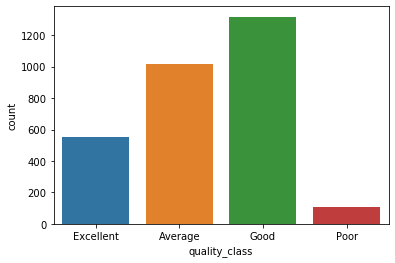

In [28]:
print(wine_train.groupby('quality_class').size())

sns.countplot(wine_train['quality_class'],label="Count")
plt.show()

As above we can see the distribution of category of quality, it is a imbalance dataset which `Poor` and ` Excellent` is minority.

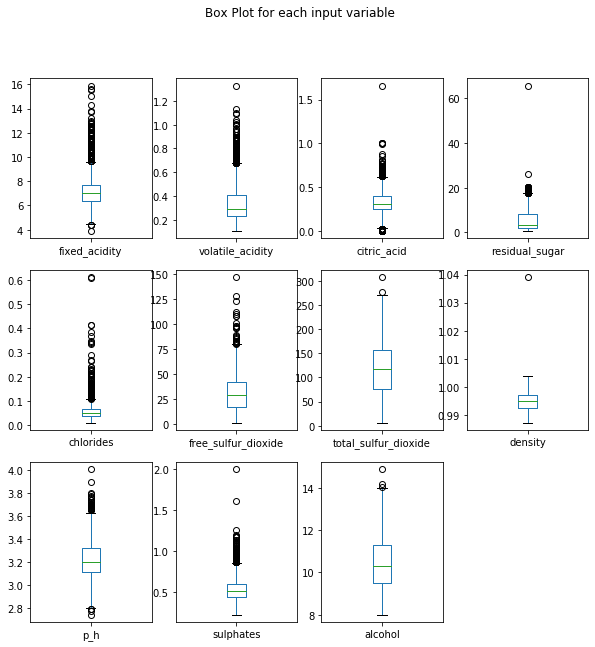

In [29]:
wine_train.drop('quality', axis=1).plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(10,10), 
                                        title='Box Plot for each input variable')
plt.show()

we can see from boxplot that there are a lot of outliers. It means the noise is large effect in the dataset.

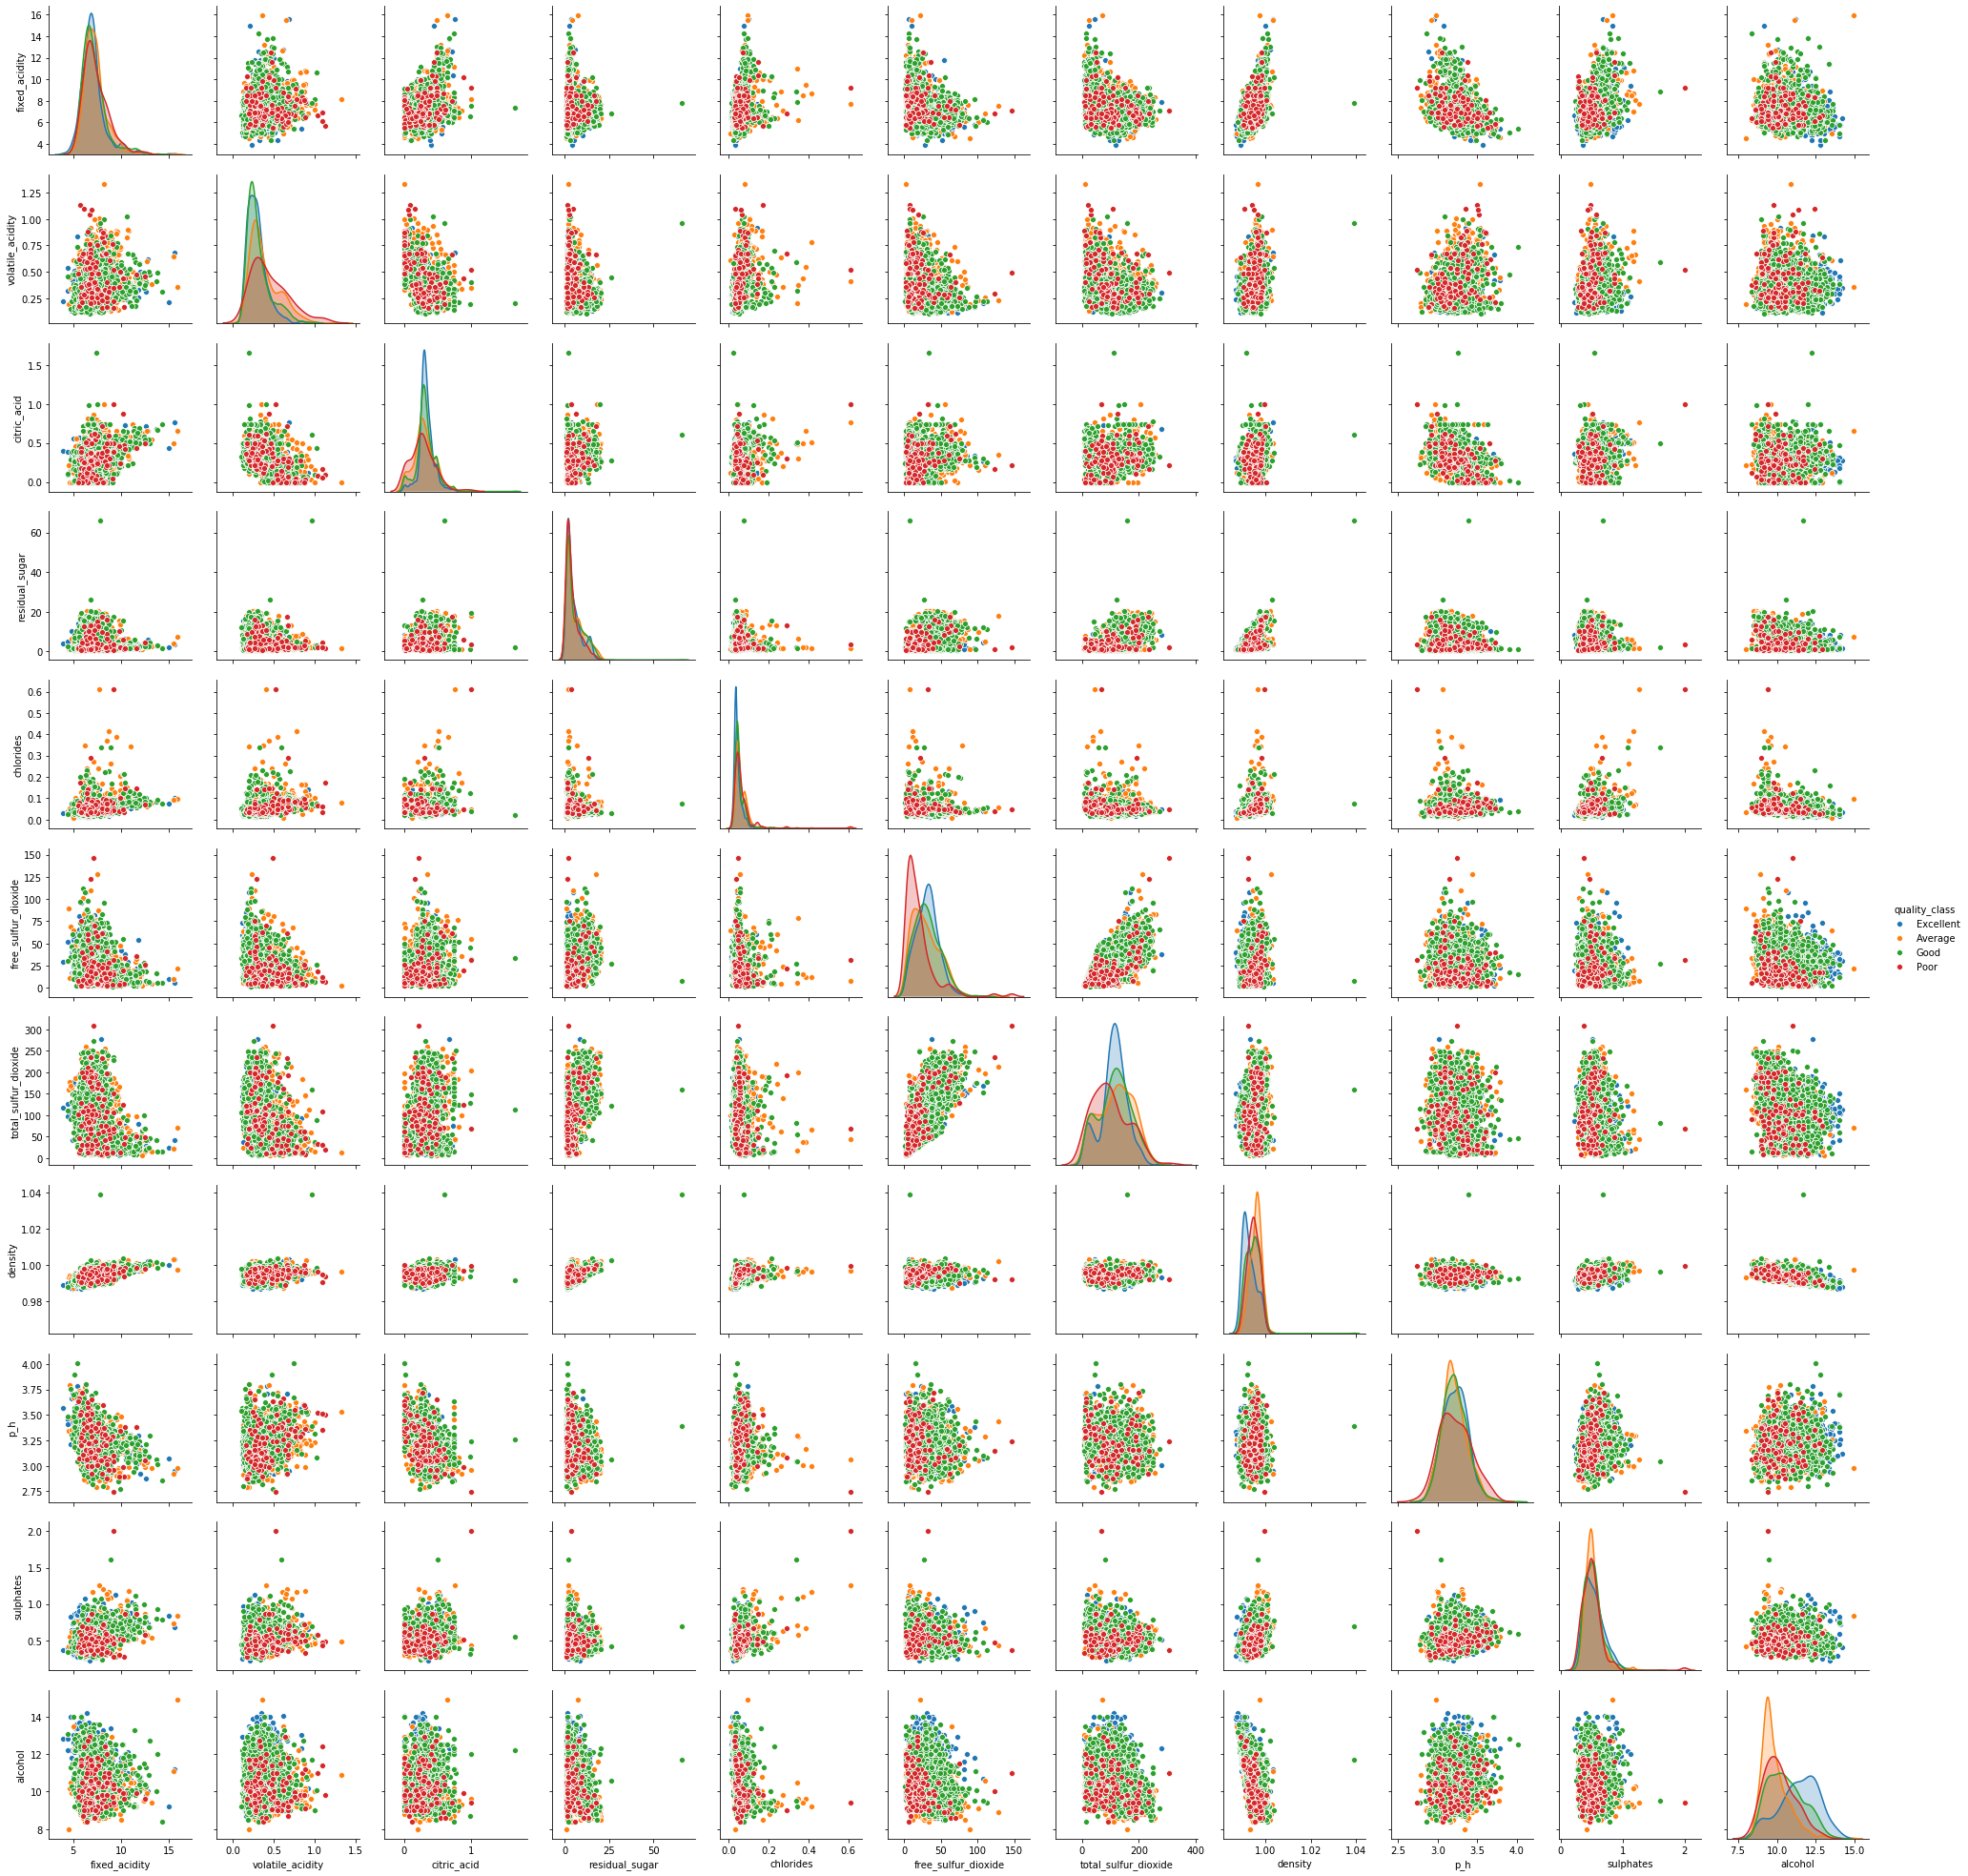

In [30]:
sns.pairplot(wine_train.drop('quality', axis=1),'quality_class')

The distribution of categorys of quality is overlapping with each other, Especially `Poor` is layout on the `Good`. There is no clear linear relationship.

### Preprocessing

In [71]:
feature_names = ['wine', 'fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','p_h','sulphates','alcohol']
X_train = wine_train[feature_names]
y_train = wine_train['quality_class']
X_test=wine_test[feature_names]
y_test=wine_test['quality_class']

Because of imbalance data, the performance to minority data will be not good. Especially noises in dataset are significant since it will be difficult for algorithm to identify if they are noises or minority data. We use oversampling strategy to solve imbalance data to generate more "artificial" samples. Here we are choosing SMOTE mothed.

Undersampling strategy has been tried but the oversampling strategy is better.

In [72]:
#oversampling_randomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_sample(X_train, y_train)

In [68]:
#oversampling_SMOTE
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=0)
X_train, y_train = ros.fit_sample(X_train, y_train)

In [ ]:

from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_train, y_train = cc.fit_resample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=0)
X_train, y_train = cnn.fit_sample(X_train, y_train)

## Apply scalling

In [69]:
S = StandardScaler().fit(X_train.append(X_test))
X_train = S.transform(X_train)
X_test = S.transform(X_test)

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, regression trees, support vector machines, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using.*

*For example if you considered a logistic regression model, a classification tree, and a support vector machine model and ultimately settled on the logistic regression approach then you should mention that other two approaches were tried but do not include any of the code or any in-depth discussion of these models beyond why they were rejected. Additional code for these models should be included in a supplemental materials notebook. What this section should then detail is the development of the  model of choice in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.*

### LogisticRegression

In [62]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


y_predict = logreg.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of Logistic regression classifier on training set: 0.54
Accuracy of Logistic regression classifier on test set: 0.45
[[173  28  57  67]
 [ 24 118  45  15]
 [101 136 130  62]
 [  9   6   2  27]]
              precision    recall  f1-score   support

     Average       0.56      0.53      0.55       325
   Excellent       0.41      0.58      0.48       202
        Good       0.56      0.30      0.39       429
        Poor       0.16      0.61      0.25        44

    accuracy                           0.45      1000
   macro avg       0.42      0.51      0.42      1000
weighted avg       0.51      0.45      0.45      1000



### Decision Tree

In [63]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.55
[[205  20  75  25]
 [ 25 104  68   5]
 [ 85  78 237  29]
 [ 21   1  15   7]]
              precision    recall  f1-score   support

     Average       0.61      0.63      0.62       325
   Excellent       0.51      0.51      0.51       202
        Good       0.60      0.55      0.58       429
        Poor       0.11      0.16      0.13        44

    accuracy                           0.55      1000
   macro avg       0.46      0.46      0.46      1000
weighted avg       0.56      0.55      0.56      1000



### K-Nearest Neighbors

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_predict = knn.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53
[[222  21  49  33]
 [ 12 136  42  12]
 [116 117 158  38]
 [ 17   8   6  13]]
              precision    recall  f1-score   support

     Average       0.60      0.68      0.64       325
   Excellent       0.48      0.67      0.56       202
        Good       0.62      0.37      0.46       429
        Poor       0.14      0.30      0.19        44

    accuracy                           0.53      1000
   macro avg       0.46      0.51      0.46      1000
weighted avg       0.57      0.53      0.53      1000



### Gaussian Naive Bayes

In [65]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
y_predict = gnb.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of GNB classifier on training set: 0.44
Accuracy of GNB classifier on test set: 0.36
[[153  68  24  80]
 [ 18 148  28   8]
 [102 222  45  60]
 [  8  15   2  19]]
              precision    recall  f1-score   support

     Average       0.54      0.47      0.50       325
   Excellent       0.33      0.73      0.45       202
        Good       0.45      0.10      0.17       429
        Poor       0.11      0.43      0.18        44

    accuracy                           0.36      1000
   macro avg       0.36      0.44      0.33      1000
weighted avg       0.44      0.36      0.34      1000



### Support Vector Machine

In [66]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
y_predict = svm.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of SVM classifier on training set: 0.69
Accuracy of SVM classifier on test set: 0.51
[[212  24  48  41]
 [  9 134  45  14]
 [105 135 146  43]
 [ 17   3   9  15]]
              precision    recall  f1-score   support

     Average       0.62      0.65      0.63       325
   Excellent       0.45      0.66      0.54       202
        Good       0.59      0.34      0.43       429
        Poor       0.13      0.34      0.19        44

    accuracy                           0.51      1000
   macro avg       0.45      0.50      0.45      1000
weighted avg       0.55      0.51      0.51      1000



### RandomForest

In [70]:
RFC = RandomForestClassifier(n_estimators=100,random_state=20,class_weight="balanced")
RFC.fit(X_train, y_train)
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(RFC.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(RFC.score(X_test, y_test)))
y_predict = RFC.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of RFC classifier on training set: 1.00
Accuracy of RFC classifier on test set: 0.64
[[236  12  65  12]
 [ 10 131  60   1]
 [ 86  77 256  10]
 [ 17   2  12  13]]
              precision    recall  f1-score   support

     Average       0.68      0.73      0.70       325
   Excellent       0.59      0.65      0.62       202
        Good       0.65      0.60      0.62       429
        Poor       0.36      0.30      0.33        44

    accuracy                           0.64      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.63      0.64      0.63      1000



### Tuning model

In [ ]:
'''
scores = []
for i in range(0,200,10):
    rf = RandomForestClassifier(n_estimators=i+1,random_state=20)
    score = cross_val_score(rf,X_train,y_train,cv=10).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(1,201,10),scores)
plt.show()
'''

In [ ]:
'''
scores = []
for i in range(175,190,1):
    rf = RandomForestClassifier(n_estimators=i+1,random_state=20)
    score = cross_val_score(rf,X_train,y_train,cv=10).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(176,191,1),scores)
plt.show()#178
'''

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {"n_estimators":np.arange(1,201,10)}
rf = RandomForestClassifier(random_state=20)
grid = GridSearchCV(rf,grid_params,cv = 10)
grid.fit(X_train,y_train)
print(grid.best_params_,grid.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {"max_depth":np.arange(1,21,1)}
rf = RandomForestClassifier(n_estimators=181,random_state=20)
grid = GridSearchCV(rf,grid_params,cv = 10)
grid.fit(X_train,y_train)
print(grid.best_params_,grid.best_score_)


In [ ]:
RFC_tun = RandomForestClassifier(n_estimators=121,max_depth=4,random_state=20)
RFC_tun.fit(X_train, y_train)
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(RFC.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(RFC.score(X_test, y_test)))
y_predict = RFC.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_predict))

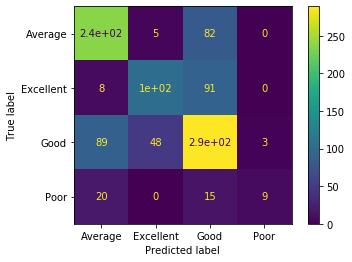

In [40]:
#@interact(normalize=[None, 'true', 'pred', 'all'], estimator = [RFC, RFC_tun ])


sklearn.metrics.plot_confusion_matrix(RFC, X_test, y_test, include_values=True, normalize=None)

In [ ]:
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_names[indices[f]], importances[indices[f]]))

## 4. Discussion


*In this section you should provide a general overview of your final model and its performance. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant. The target audience for this should be someone who is familiar with the basics of mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful. Your discussion should also include some discussion of differences in potential losses incurred by misclassification - i.e. classifying a "poor" wine as "excellent" is likely not the same as misclassifying an "excellent" wine as "good".*

## 5. Model Validation

*We have provided a third csv file called `wine_qual_holdout.csv` which we will be using for assessing the predictive performance of your model. The file provided with the assignment contains **identical** data to `wine_qual_test.csv`, however after you turn in your notebook we will be replacing this file with the true holdout data (1000 additional wines not included in the train or test set) and rerunning your notebook.*

*The objective of this is two-fold, the first is to ensure that your modeling code is reproducible and everything can be rerun and "identical" results can be obtained. And second, to obtain a reliable estimate of your final model's predictive performance, which will be compared across all of the projects in the course.*

*You should include a brief write up in the section detailing the performance of your model, in particular you should discuss the implications of this modeling uncertainty in the context of classifying wine quality.*

In [ ]:
wine_holdout = pd.read_csv("wine_qual_holdout.csv")

# Adjust this code as necessary to preprocess the holdout data
X_holdout = wine_holdout.drop('quality', axis=1)
y_holdout = wine_holdout.quality

In [ ]:
# This is a placeholder model so the subsequent cell runs
# DELETE this cell once `final_model` or equivalent is defined
# in Section 3.

from sklearn.linear_model import LogisticRegression

X_holdout = X_holdout.select_dtypes(exclude='object')
final_model = LogisticRegression().fit(X_holdout, y_holdout)

In [ ]:
# Calculate the confusion matrix for your model
# 
# Change the name of `final_model` to reflect the name of your fitted model object

sklearn.metrics.confusion_matrix(y_holdout, final_model.predict(X_holdout))

In [ ]:
# Calculate the classification report for your model
# 
# Change the name of `final_model` to reflect the name of your fitted model object

print(
    sklearn.metrics.classification_report(y_holdout, final_model.predict(X_holdout))
)

In [ ]:
# Alternative metrics can be included below